# Generating a DNA Snake

Here we demonstrate how we can generate oxDNA models of a single ssDNA Strand folded into a given 2D shape - folded only twice on each row, hence _snake_.


In [4]:
from origamiUROP.oxdna import System
from origamiUROP.lattice import LatticeRoute
from origamiUROP.polygons import BoundaryPolygon

import numpy as np

from os import path

ROOT = "/".join(path.abspath('').split("/"))

## Define `generate` function 

In [13]:
def generate(polygon_vertices: np.ndarray, DNAout: str = None, PLOTout: str = None, plot: bool = True, title: str = None):
    # Generate the polygon using the `BoundaryPolygon` class
    polygon = BoundaryPolygon(polygon_vertices)
    
    # The `dna_snake` method generates a `Lattice` object.
    # The algorithm works from the bottom up but the lattice will depend on the
    # subsequent routing of the scaffold, which you can choose a starting side for 
    # (default: left)
    lattice = polygon.dna_snake(start_side="left")
    
    # Generates the coordinates for all possible lattice points, i.e. sites
    # representing nucleotide sites when the DNA scaffold has been routed through
    # the lattice
    lattice_coordinates = lattice.final_coords
    lattice_crossovers = lattice.crossover_coords

    # Routes a scaffold through the lattice, starting at the previously stated
    #`start_side`. Currently this can only choose the first and last site on each row 
    # to route the scaffold. In the future, we should be able to choose 4/6 etc.
    route = lattice.route()
    
    if plot:
        # Plot the lattice and the corresponding crossovers and the initial polygon
        # which was defined by polygon_vertices
        lattice.plot([lattice_coordinates, lattice_crossovers], 
                    fout=PLOTout,
                    root=ROOT + "/imgs/",
                    poly = True,
                    title = title)

        # Plot the scaffold 'route'
        route.plot()

    # Generate an oxDNA `System` object from `route` nodes 
    # and output oxDNA .top and .conf files.
    system = route.system()
    if DNAout:
        system.write_oxDNA(prefix = DNAout, root=ROOT + "/oxDNA_out")

## Generating a square

In [12]:
square = np.array([[0.0, 0.0, 0.0], [10.0, 0.0, 0.0], [10.0, 4.0, 0.0], [0.0, 4.0, 0.0]])

# Generate the oxDNA file but don't show or output the plots
generate(square, DNAout="square", PLOTout=None, plot=False)
generate(square*5, DNAout="square", PLOTout=None, plot=False)

| ![title](oxDNA_renders/square_views.png) |
|:--:| 
| *Visualised using OVITO* |

## Generating trapeziums

*Note:* as we can see with the plot (as shown below) the first trapezium (size 10) is too small and the sides too shallow for the desired shape to form.

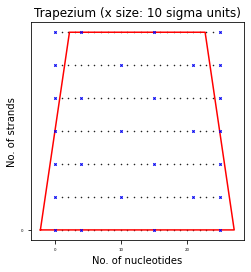

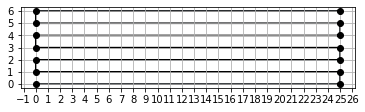

In [7]:
trap = np.array([[0.,0.,0.],[1.5,6.,0.],[8.5,6.,0.],[10.,0.,0.]])
generate(trap, DNAout="trap10", PLOTout=None, plot = True, title = "Trapezium (x size: 10 sigma units)")
generate(trap*2, DNAout="trap20", PLOTout=None, plot = False)
generate(trap*4, DNAout="trap40", PLOTout=None, plot = False)

| ![title](oxDNA_renders/Trap10_views.png) | ![title](oxDNA_renders/Trap20_views.png) |
| --- |
![title](oxDNA_renders/Trap40_views.png)

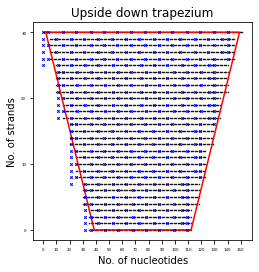

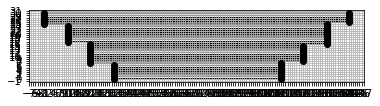

In [8]:
trapREV = np.array([[0.,10.,0.],[2.5,4.,0.],[7.5,4.,0.],[10.,10.,0.]])
generate(trapREV*5, DNAout="trapezium_rev",PLOTout=None, plot=True, title="Upside down trapezium")

## Generating triangles

As can be seen, once again, where the inputted shape is too small, the generated scaffold and lattice can struggle with corresponding to that shape.

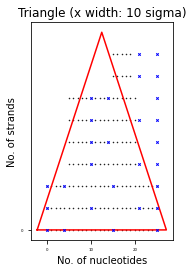

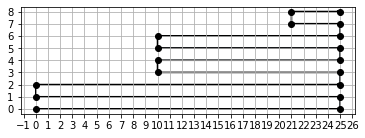

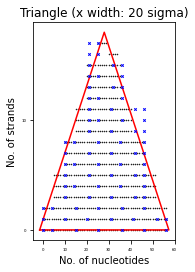

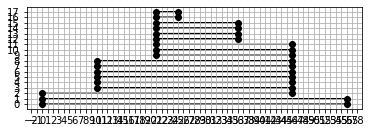

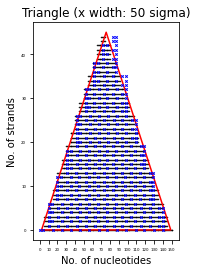

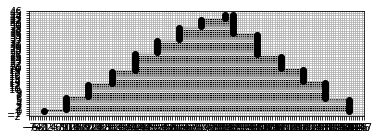

In [9]:
triangle = np.array([[0,0,0],[5,9,0],[10,0,0]])
generate(triangle, DNAout=None,PLOTout=None, plot= True, title = "Triangle (x width: 10 sigma)")
generate(triangle*2, DNAout="triangle_20",PLOTout=None, plot= True, title = "Triangle (x width: 20 sigma)")
generate(triangle*5, DNAout="triangle_50",PLOTout=None, plot= True, title = "Triangle (x width: 50 sigma)")

## Generating hexagons
The smaller shapes once again suffer a little with the current algorithm. Even when we get to slightly larger shapes, the algorithm still struggles with shallower slopes. The point-base hexagon renders a much better shape than the flat-base hexagon, which is a little skewed.

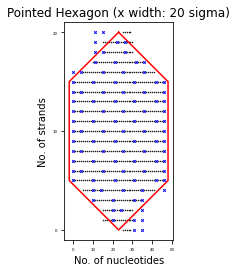

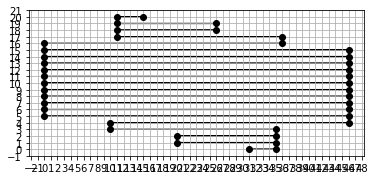

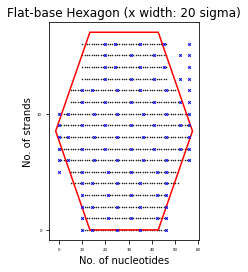

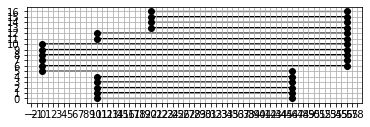

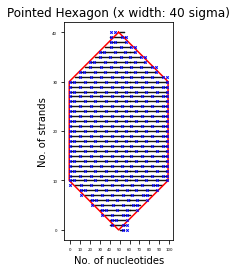

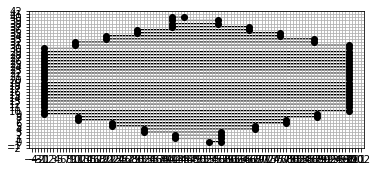

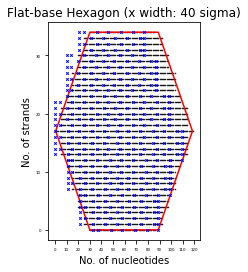

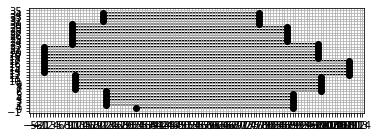

In [10]:
pointy_hex = np.array([[0, 1, 0], [0.85, 0.5, 0], [0.85, -0.5, 0], [0, -1, 0], [-0.85, -0.5, 0], [-0.85, 0.5, 0]])
flat_hex = np.array([[1.0,-0.85,0],[2.0, -0.85, 0],[2.5, 0, 0],[2.0, 0.85,0],[1.0,0.85,0],[0.5, 0.0,0.0]])

generate(pointy_hex*10, DNAout="pointy_hex20",PLOTout=None, plot= True, title = "Pointed Hexagon (x width: 20 sigma)")
generate(flat_hex*10, DNAout="flat_hex20",PLOTout=None, plot= True, title = "Flat-base Hexagon (x width: 20 sigma)")
generate(pointy_hex*20, DNAout="pointy_hex40",PLOTout=None, plot= True, title = "Pointed Hexagon (x width: 40 sigma)")
generate(flat_hex*20, DNAout="flat_hex40",PLOTout=None, plot= True, title = "Flat-base Hexagon (x width: 40 sigma)")

## Generating modular shapes (e.g. a plus, capital letter I, stacked I's)

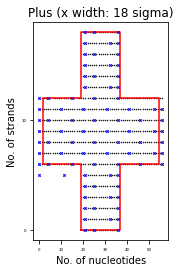

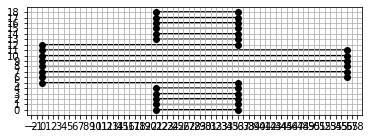

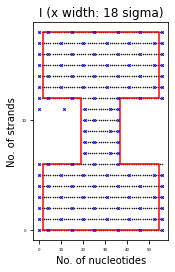

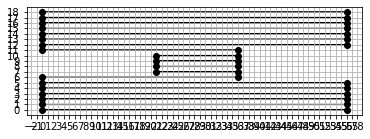

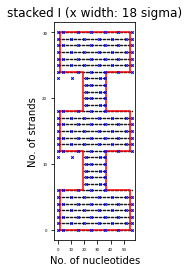

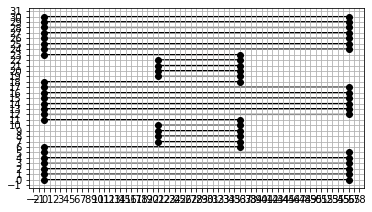

In [11]:
plus = np.array([
    [1.,0.,0.], [2.,0.,0.], [2.,1.,0.], [3.,1.,0.], [3.,2.,0.], [2.,2.,0.],
    [2.,3.,0.], [1.,3.,0.], [1.,2.,0.], [0.,2.,0.], [0.,1.,0.], [1.,1.,0.]
    ])
capital_I = np.array([
    [0.,0.,0.],[3.,0.,0.],[3.,1.,0.],[2.,1.,0.], [2.,2.,0.],[3.,2.,0.],
    [3.,3.,0.],[0.,3.,0.],[0.,2.,0.],[1.,2.,0.],[1.,1.,0.],[0.,1.,0.]
    ])
stacked_I = np.array([
    [0.,0.,0.],[3.,0.,0.],[3.,1.,0.],[2.,1.,0.], [2.,2.,0.],[3.,2.,0.],
    [3.,3.,0.],[2.,3.,0.],[2.,4.,0.],[3.,4.,0.],[3.,5.,0.],[0.,5.,0.],[0.,4.,0.],[1.,4.,0.],
    [1.,3.,0.],[0.,3.,0.], [0.,2.,0.],[1.,2.,0.],[1.,1.,0.],[0.,1.,0.]
    ])
    
generate(plus*6, DNAout="plus_18",PLOTout=None, plot= True, title = "Plus (x width: 18 sigma)")
generate(capital_I*6, DNAout="I_18",PLOTout=None, plot= True, title = "I (x width: 18 sigma)")
generate(stacked_I*6, DNAout="II_18",PLOTout=None, plot= True, title = "stacked I (x width: 18 sigma)")
generate(plus*12, DNAout="plus_36",PLOTout=None, plot= False, title = "Plus (x width: 36 sigma)")
generate(capital_I*12, DNAout="I_36",PLOTout=None, plot= False, title = "Side H (x width: 36 sigma)")
generate(stacked_I*12, DNAout="II_36",PLOTout=None, plot= False, title = "stacked I (x width: 36 sigma)")